In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv('data.csv')

In [26]:
df = pd.DataFrame(data)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [28]:
df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Size', 'Popularity'], axis=1, inplace=True)

In [29]:
df.drop(['Number of Doors', 'Vehicle Style'], axis=1, inplace=True)

In [30]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [31]:
df.rename(columns={'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission', 'Driven_Wheels': 'Drive Mode', 'highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price'}, inplace=True)
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [32]:
df.shape

(11914, 10)

In [33]:
df[df.duplicated()].shape

(989, 10)

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.dropna(inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10827 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          10827 non-null  object 
 1   Model         10827 non-null  object 
 2   Year          10827 non-null  int64  
 3   HP            10827 non-null  float64
 4   Cylinders     10827 non-null  float64
 5   Transmission  10827 non-null  object 
 6   Drive Mode    10827 non-null  object 
 7   MPG-H         10827 non-null  int64  
 8   MPG-C         10827 non-null  int64  
 9   Price         10827 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.4+ KB


In [37]:
df[df.isnull().any(axis=1)]

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price


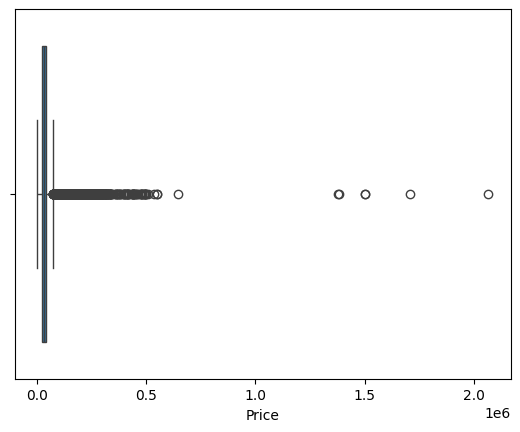

In [38]:
sns.boxplot(x=df['Price'])
plt.show()

In [39]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

21327.5


In [40]:
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


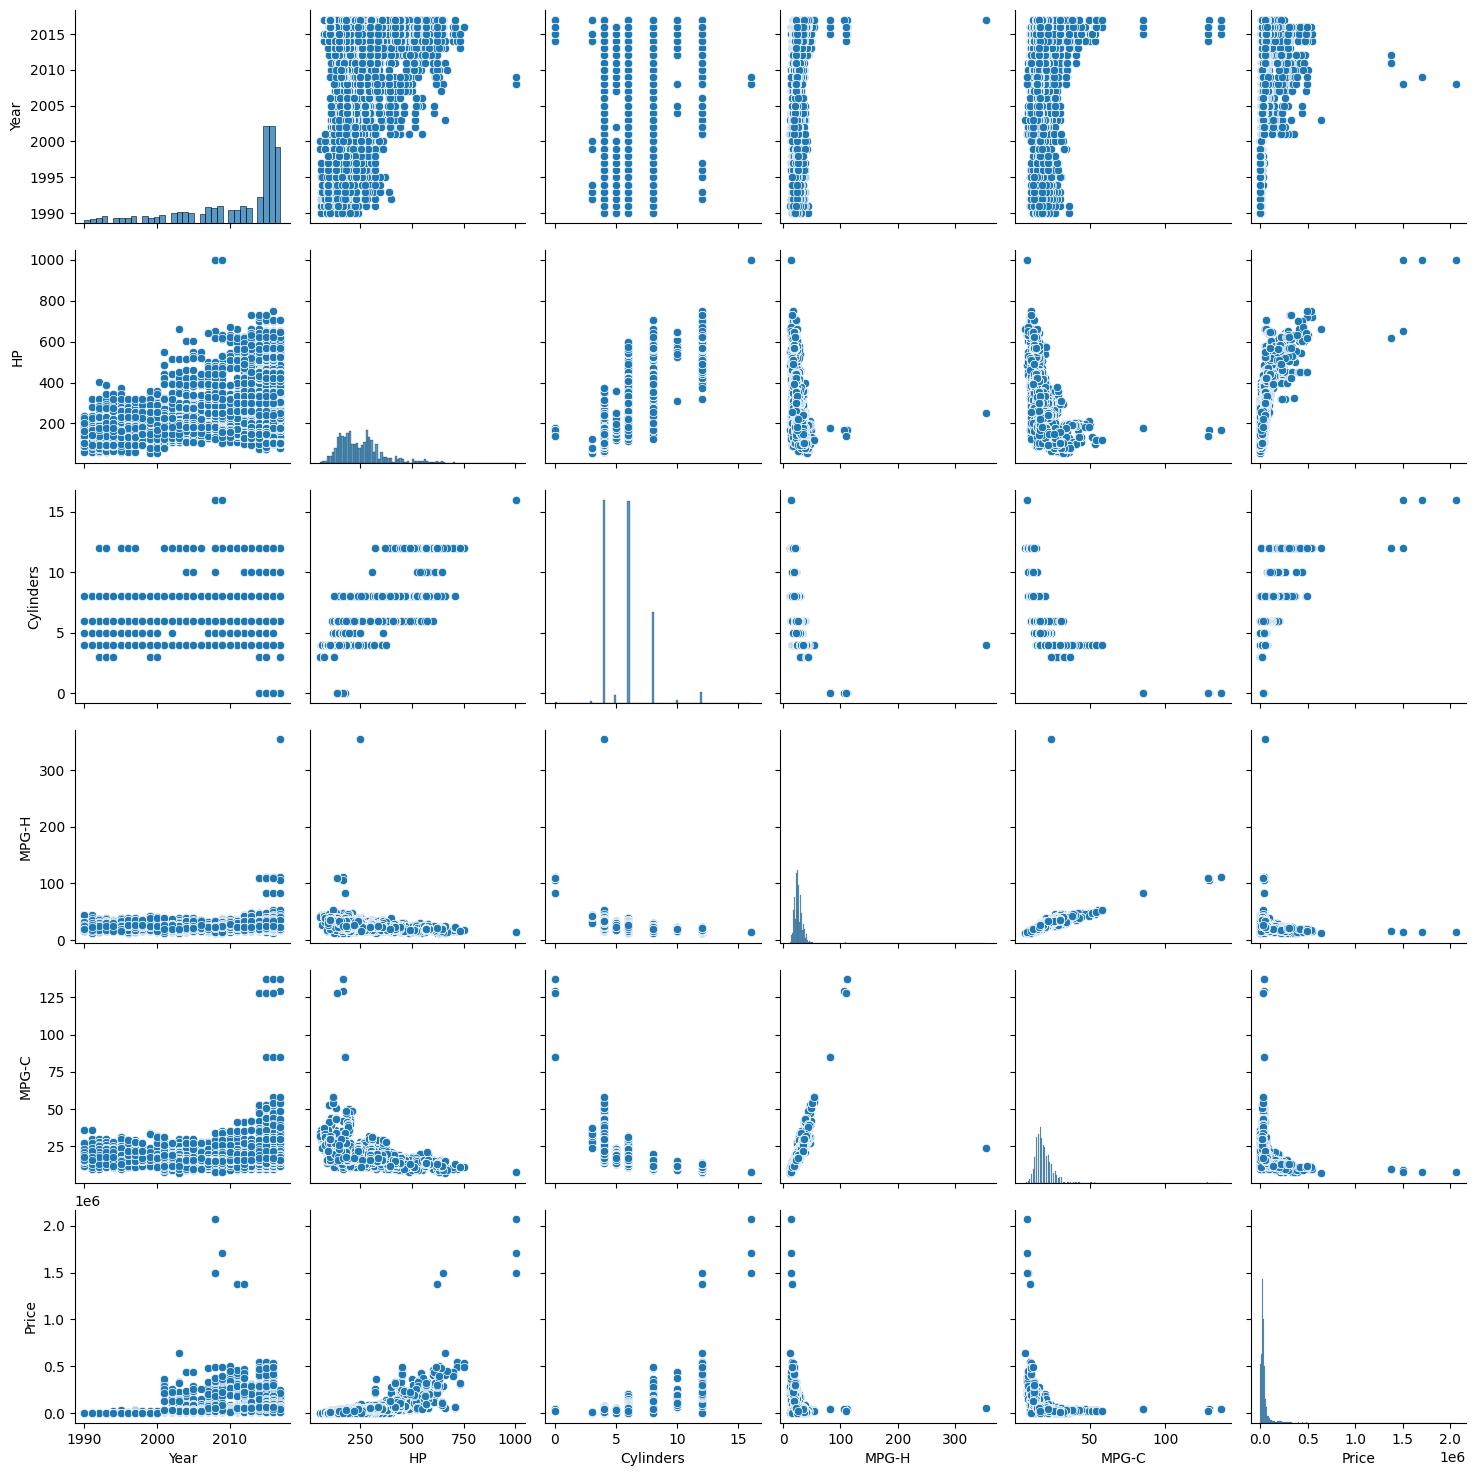

In [41]:
sns.pairplot(df)
plt.show()

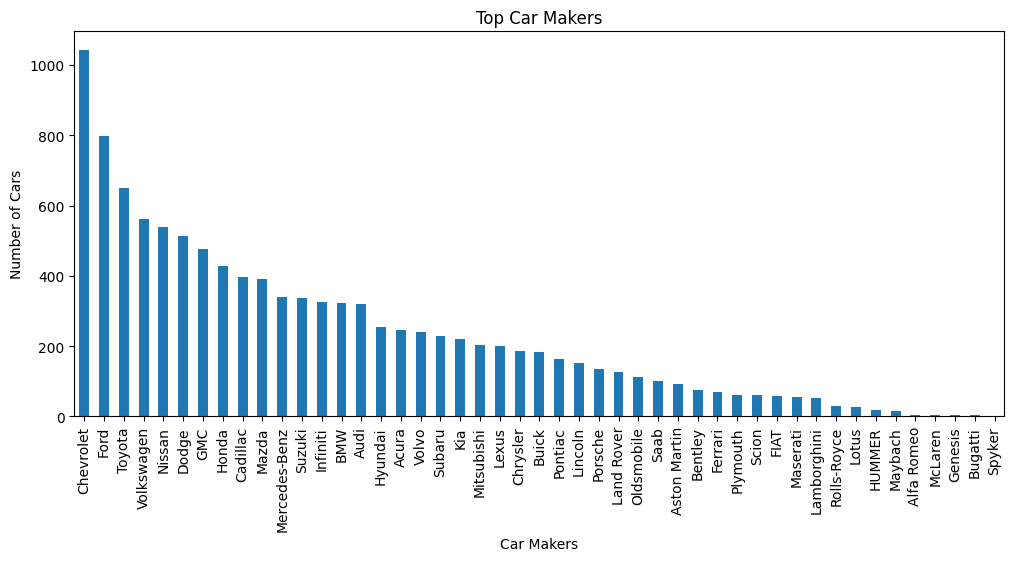

In [42]:
df['Make'].value_counts().nlargest(100).plot(kind='bar', figsize=(12,5))
plt.title('Top Car Makers')
plt.xlabel('Car Makers')
plt.ylabel('Number of Cars')
plt.show()

In [43]:
numdf = df.drop(['Make', 'Model', 'Transmission', 'Drive Mode'], axis=1)

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG-H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG-C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


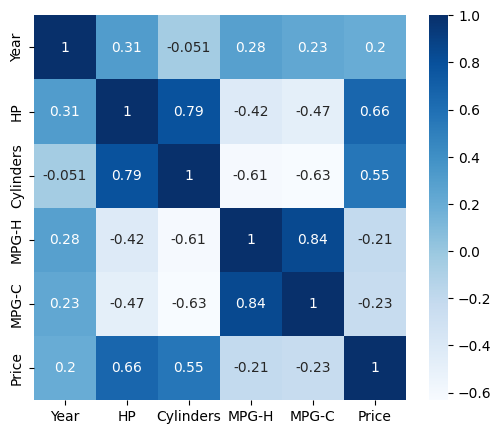

In [44]:
plt.figure(figsize=(6,5))
c = numdf.corr()
sns.heatmap(c, annot=True, cmap='Blues')
c

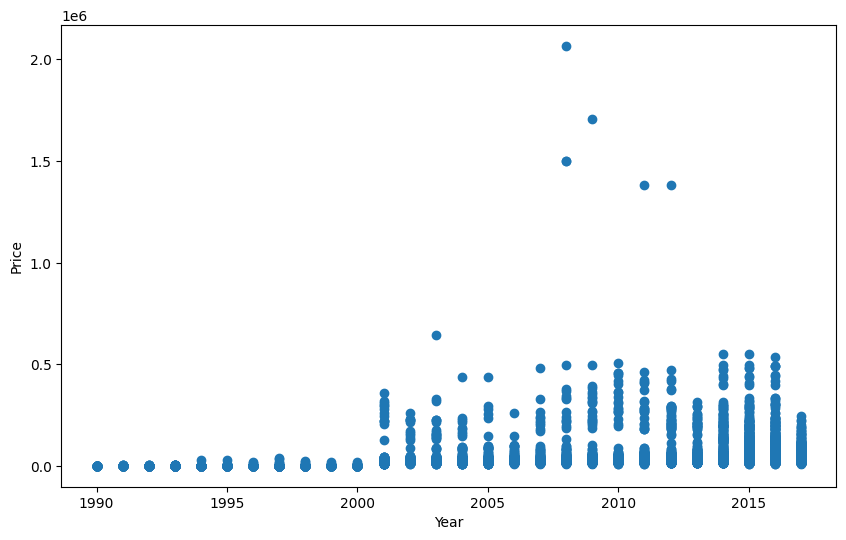

In [45]:
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(df['Year'], df['Price'])
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

# Machine Learning -
### Supervised (Regression, Clasification)                  
### Unsupervised (Clusterng)